# Before we start the t-test we should do some exploratory data analysis to create some hypothesis. 

In [1]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Let us load in our min/max adjusted data

In [3]:
data = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_EM.csv') 
#data = pd.read_excel (r'preprocess_securites.xlsx', sheet_name='HY')

In [4]:
#data.head()
data.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1999-01-31 00:00:00,1.00000,#VALUE!,#VALUE!,0.061413,0.0000,0.742285,0.734467,0.911793,0.896788,0.754677,0.726411,1.000000,0.981686,0.786902,0.725754,0.739139,0.398443,3.0
1,1999-02-28 00:00:00,1.00000,#VALUE!,#VALUE!,0.822168,0.8923,1.000000,1.000000,1.000000,1.000000,0.977482,0.950245,1.000000,1.000000,0.917165,0.888962,0.853224,0.502272,3.0
2,1999-03-31 00:00:00,1.00000,#VALUE!,#VALUE!,1.000000,1.0000,0.887461,0.894749,0.846522,0.876495,0.966473,0.916707,1.000000,1.000000,0.818541,0.754026,0.815425,0.469207,3.0
3,1999-04-30 00:00:00,0.91866,#VALUE!,#VALUE!,1.000000,1.0000,0.756134,0.787182,0.649044,0.635819,0.917259,0.875811,0.969175,0.952241,0.682769,0.549867,0.734817,0.375368,3.0
4,1999-05-31 00:00:00,1.00000,#VALUE!,#VALUE!,0.043678,0.0000,0.331229,0.325447,0.536516,0.486732,0.699631,0.662173,0.737502,0.687860,0.570753,0.362783,0.542768,0.190791,3.0


# Lets see if our variables are correlated
### With correlation matrix 
# -------------------------------------------------------------------------------

# We can explore a lot with this above, but lets focus on OAS

### We see that the further we go out the more correlated the excess return is with OAS.
#### *It would be interesting to see how the correlation would change for 24M and 36M

# You can also see interesting patterns with the 3M to the 6M,9M,12M

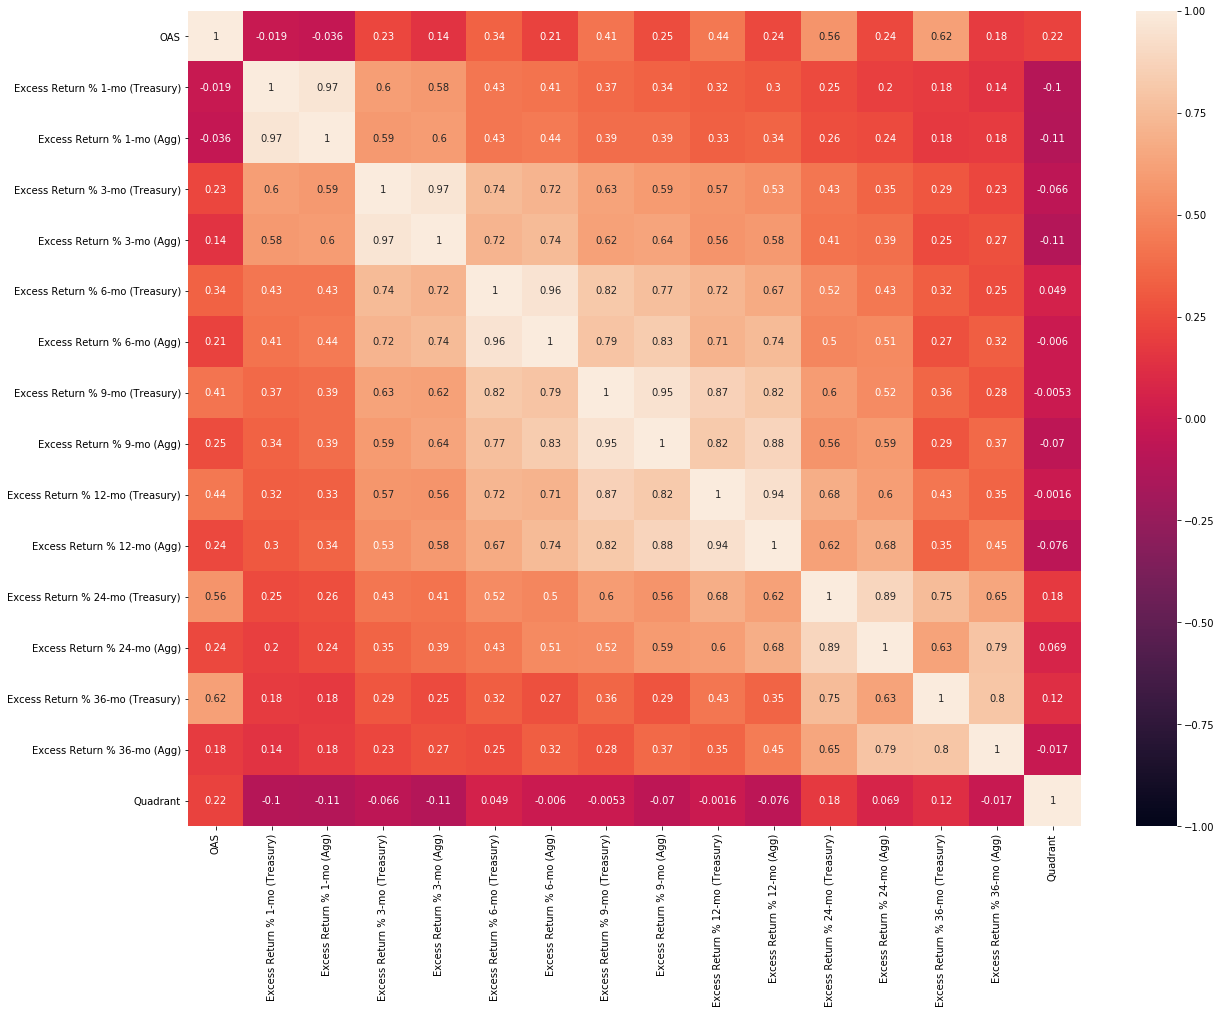

In [5]:
#Pairwise correlation between attributes
fig=plt.figure(figsize=(20, 15))
sns.heatmap(data[['OAS', 'Excess Return % 1-mo (Treasury)', 'Excess Return % 1-mo (Agg)', 'Excess Return % 3-mo (Treasury)', 'Excess Return % 3-mo (Agg)', 'Excess Return % 6-mo (Treasury)', 'Excess Return % 6-mo (Agg)','Excess Return % 9-mo (Treasury)', 'Excess Return % 9-mo (Agg)', 'Excess Return % 12-mo (Treasury)', 'Excess Return % 12-mo (Agg)', 'Excess Return % 24-mo (Treasury)','Excess Return % 24-mo (Agg)','Excess Return % 36-mo (Treasury)','Excess Return % 36-mo (Agg)','Quadrant']].corr(), vmin = -1, vmax=1, annot=True)
plt.show()

# Now that we see the picture, let us make some linear regression models.

## Relationship Between OAS & Excess Return % 1-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

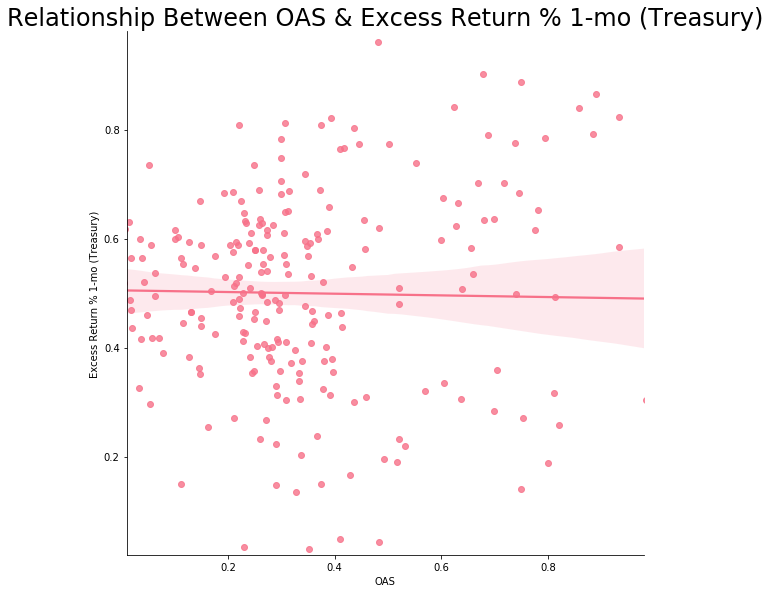

In [6]:
# For OAS Excess Return % 1-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 1-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 1-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 1-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

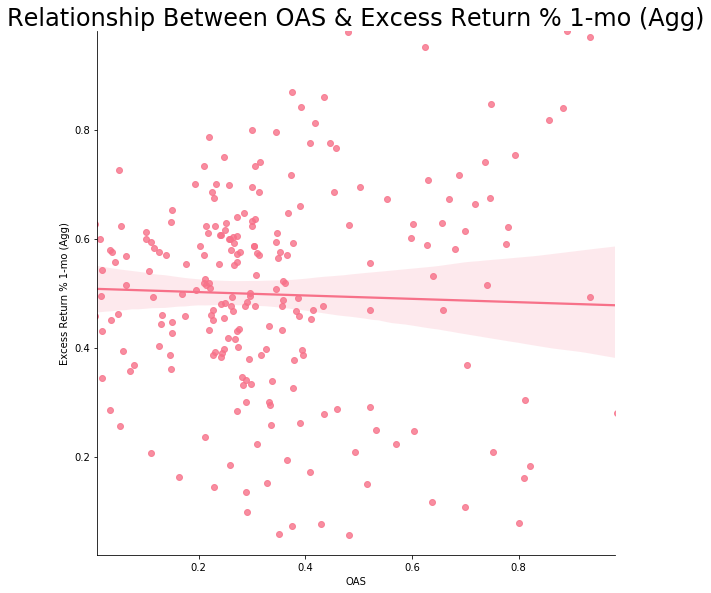

In [7]:
# For OAS Excess Return % 1-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 1-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 1-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 3-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

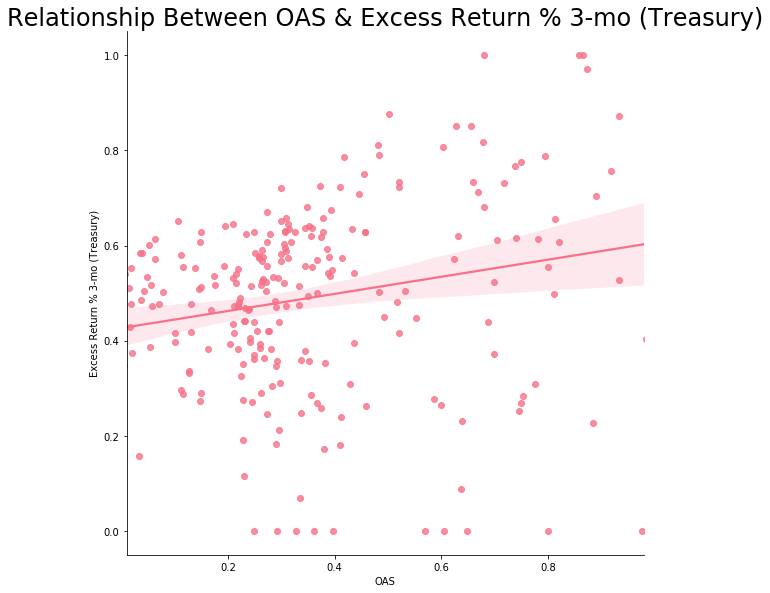

In [8]:
# For OAS Excess Return % 3-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 3-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 3-mo (Treasury)', size=24)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 3-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

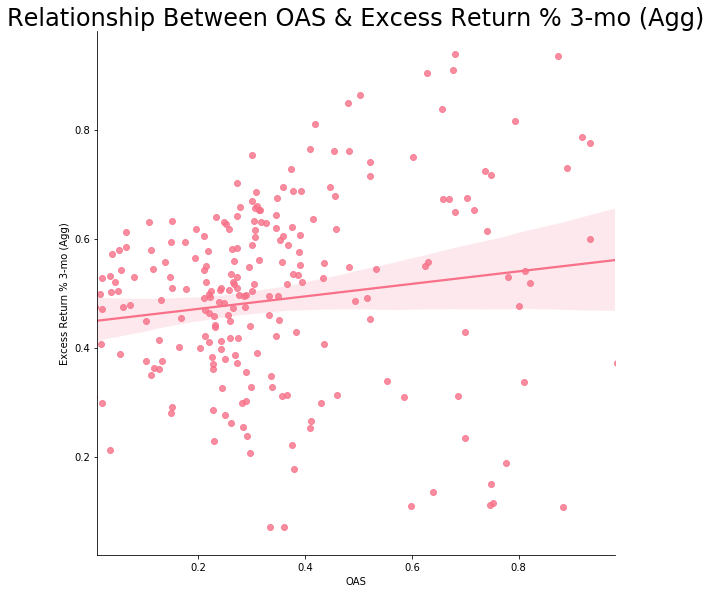

In [9]:
# For OAS Excess Return % 3-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 3-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 3-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 6-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

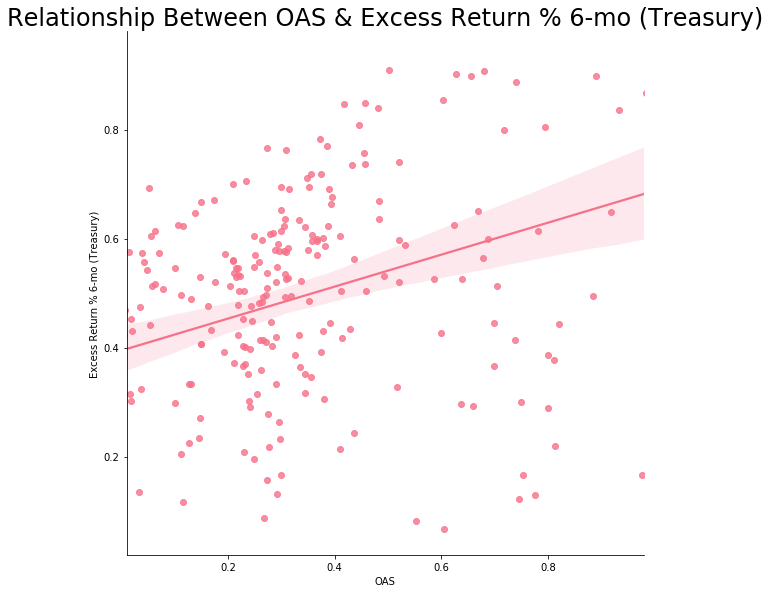

In [10]:
# For OAS Excess Return % 6-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 6-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 6-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 6-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

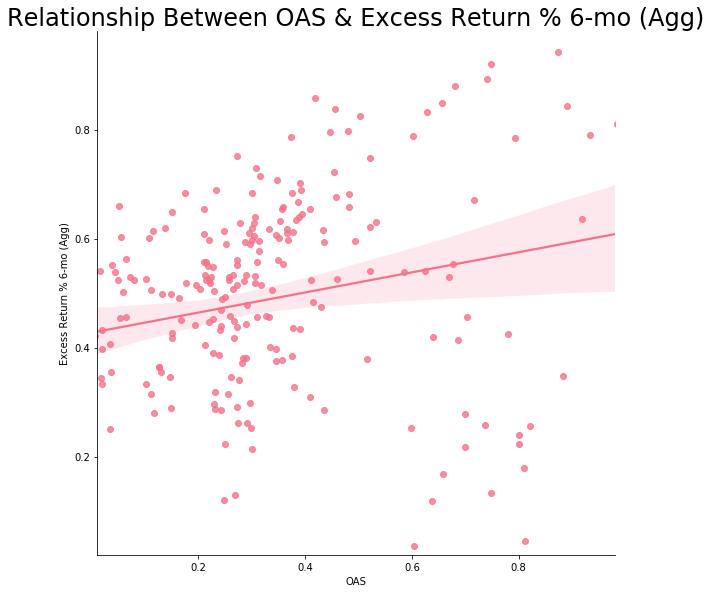

In [11]:
# For OAS Excess Return % 6-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 6-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 6-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 9-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

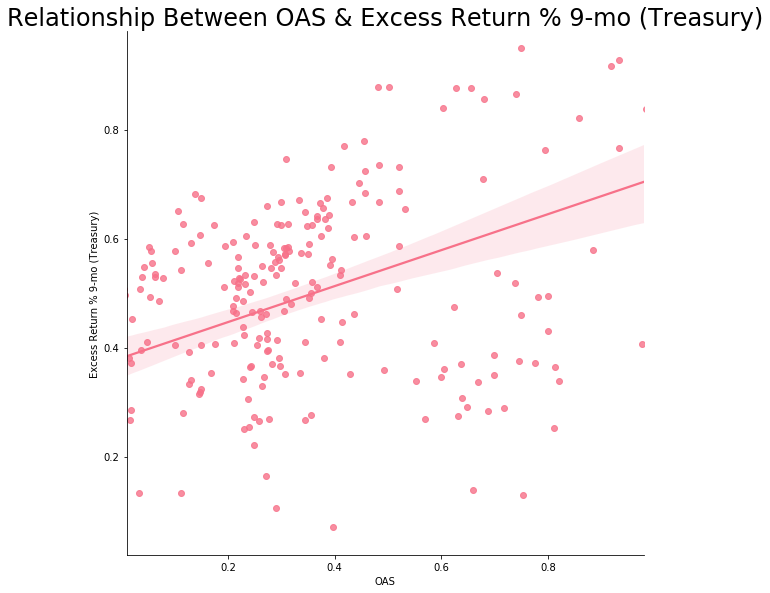

In [12]:
# For OAS Excess Return % 9-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 9-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 9-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 9-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

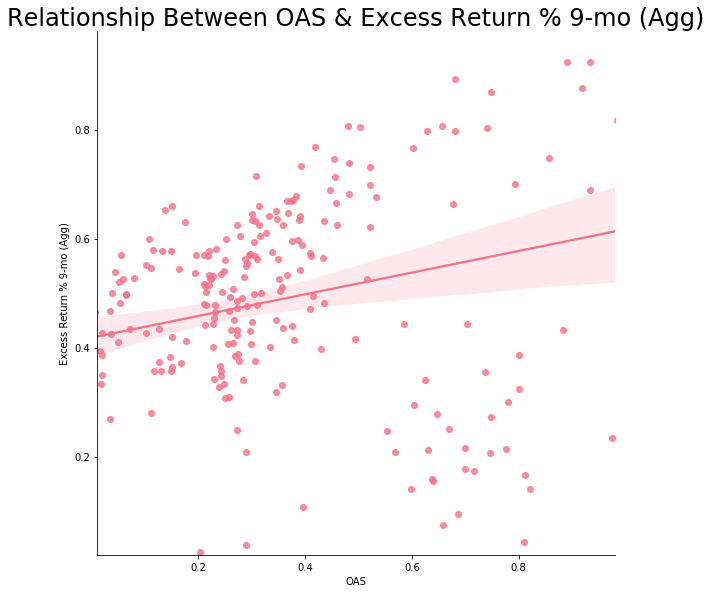

In [13]:
# For OAS Excess Return % 9-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 9-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 9-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 12-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

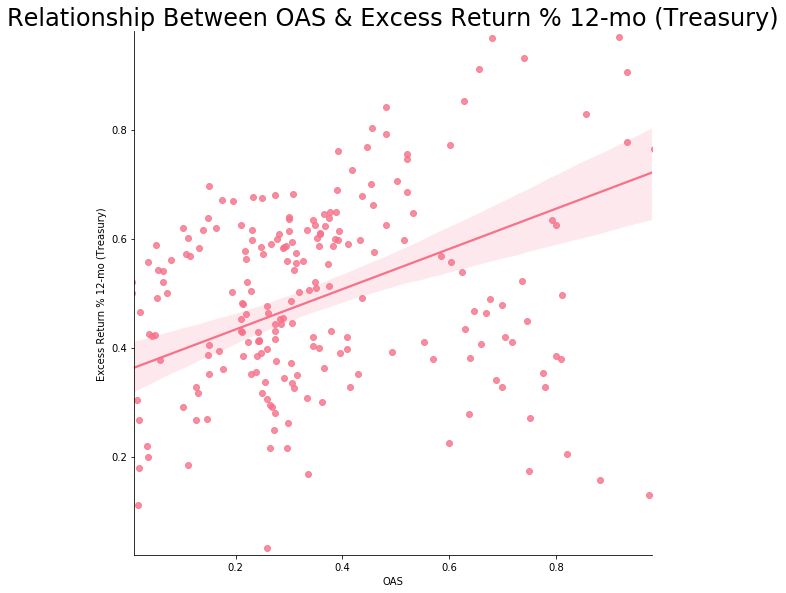

In [14]:
# For OAS Excess Return % 12-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 12-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 12-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 12-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

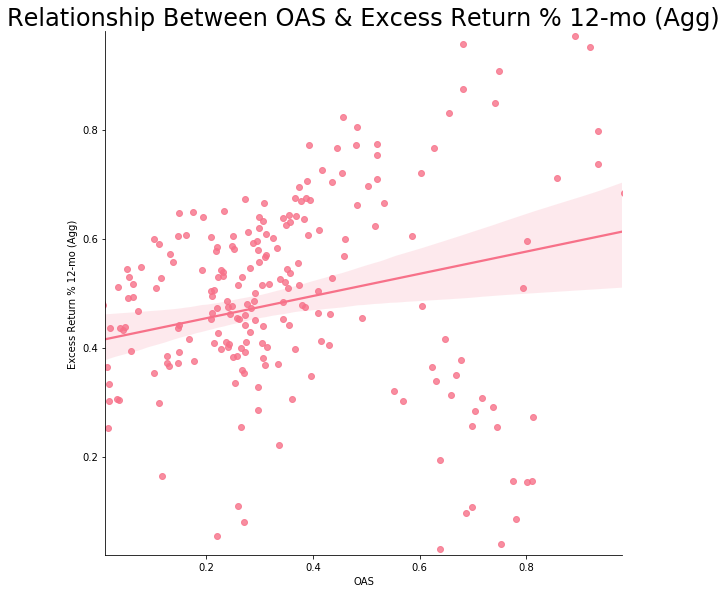

In [15]:
# For OAS Excess Return % 12-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 12-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 12-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 24-mo (Treasury) shown below.


(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

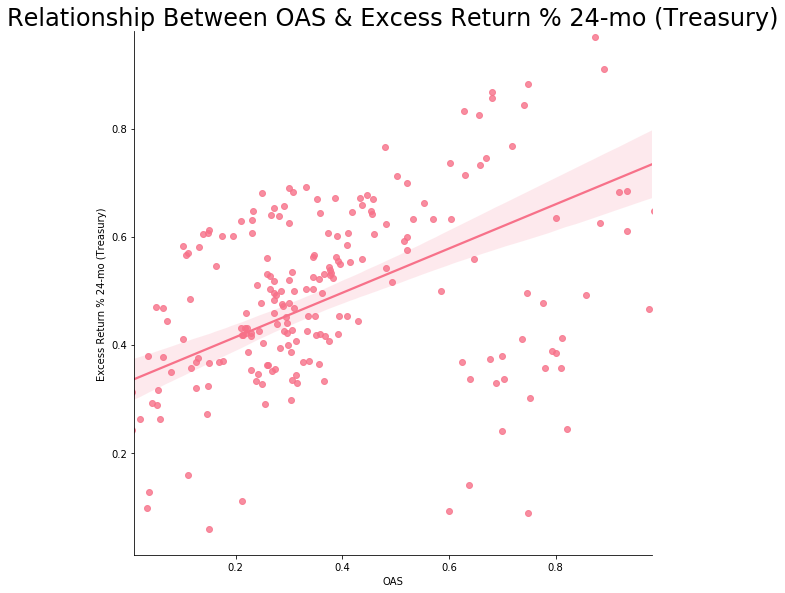

In [16]:
# For OAS Excess Return % 24-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 24-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 24-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.011)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 24-mo (Agg) shown below.


(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

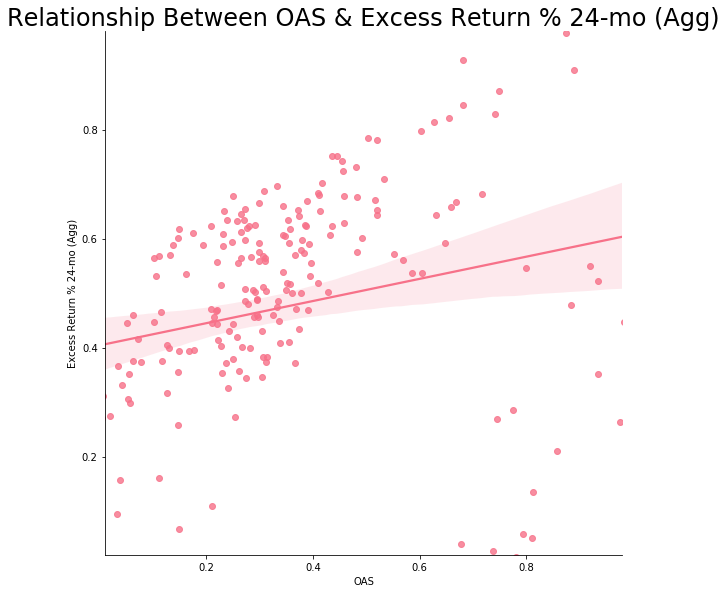

In [17]:
# For OAS Excess Return % 24-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 24-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 24-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 36-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

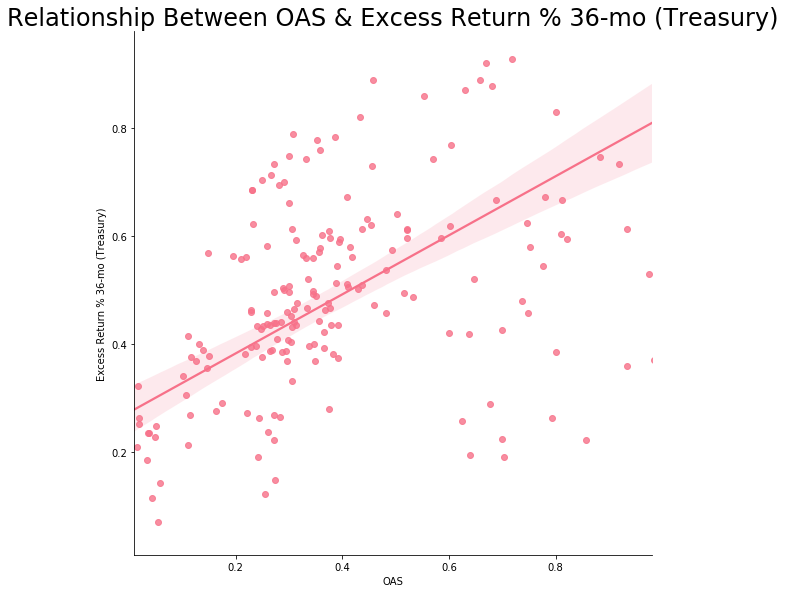

In [18]:
# For OAS Excess Return % 36-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 36-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 36-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.009)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 36-mo (Agg) shown below.


(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

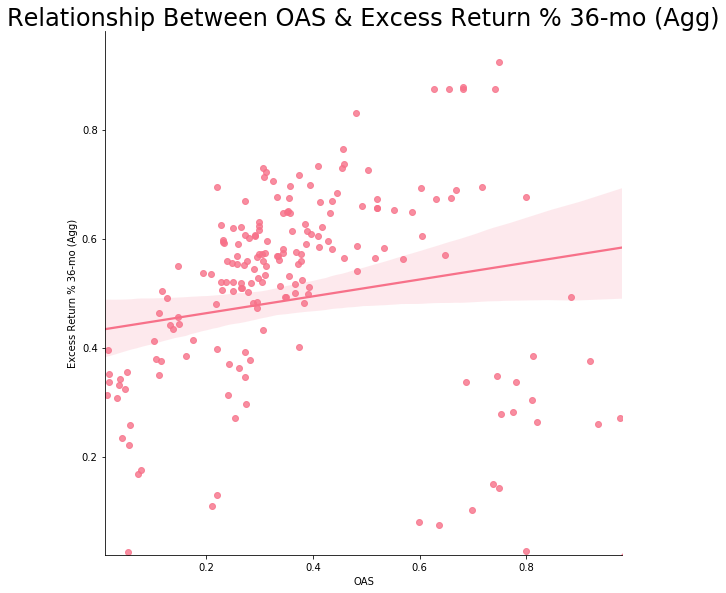

In [19]:
# For OAS Excess Return % 36-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 36-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 36-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)